# Plotting Figures for the BIDS BEP_006 EEG Report

In [1]:
import os

import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Figure showing PubMed search results

Data `pubmed_search_results.csv` obtained through search of https://www.ncbi.nlm.nih.gov/pubmed/ using "EEG[Title/Abstract]"

In [2]:
# Read the pubmed data for "EEG[Title/Abstract]"
pubmed_data = os.path.join(os.getcwd(), 'data', 'pubmed_search_results.csv')
df = pd.read_csv(pubmed_data, sep=',', skiprows=1)

# Drop current year
idx = df[df['year']==2018].index
df = df.drop(labels=idx)
df = df.reindex()

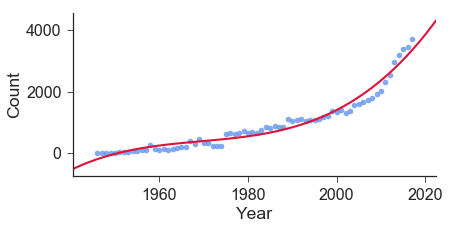

In [4]:
# Set the context and start a new figure
sns.set_style('ticks')
sns.set_context('paper', font_scale=2.)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))

# Plot data and regression fit
sns.regplot(x='year', y='count', data=df, ax=ax,
            fit_reg=True, order=3, ci=None, truncate=False,
            scatter_kws={'color': 'cornflowerblue'},
            line_kws={'color': 'crimson'})

# Labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')
#ax.set_title('Number of Publications Containing "EEG" in Title or Abstract')

# Get rid of spines
sns.despine()

# Save figure
fname = 'fig_pubmed_results.png'
fpath = os.path.join(os.getcwd(), 'figures', fname)
fig.savefig(fpath, dpi=600, bbox_inches='tight')